In [1]:
# Load libraries
import torch

Create a tensor:

In [2]:
# Create a 2x2 tensor with gradient-accumulation capabilities
x = torch.tensor([[1,2], [3, 4]],
                 requires_grad=True,
                 dtype=torch.float32)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [3]:
# Deduct 2 from all elements
y = x - 2
print(y)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


`y` was created as a result of an operation, so it has a `grad_fn`.

In [4]:
print(y.grad_fn)

In [5]:
# What's happening here?
print(x.grad_fn)

None


In [6]:
# Let's dig further...
y.grad_fn

In [7]:
y.grad_fn.next_functions[0][0]

In [8]:
y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [9]:
y

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)

In [19]:
# Do more operations on y
z = y * y * 3
a = z.mean() # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [12]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-matrgqr7
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-matrgqr7
  Resolved https://github.com/szagoruyko/pytorchviz.git to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=8e2cb9e7e908c3ea7f0fa05bb016cb420c3a587caae8b5771dba5370c9eef736
  Stored in directory: /tmp/pip-ephem-wheel-cache-em59l0dj/wheels/97/11/17/d09e895f9883bd50923ce86b249a31790356a1b88b280983d8
Successfully built torchviz


In [13]:
# Let's visualise the computational graph !
from torchviz import make_dot

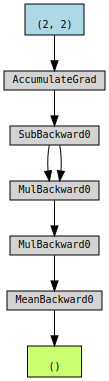

In [14]:
make_dot(a)

## Gradients

Let's backprop now out.backward() is equivalent to doing `out.backward(torch.tensor([1.0]))`

In [20]:
# Backprop
a.backward()

Print gradients $\frac{da}{dx}$

In [22]:
# Compute it by hand BEFORE executing this
print(x.grad)

None


In [23]:
# Dynamic graphs!

x = torch.randn(3, requires_grad=True)
x

tensor([ 0.3206, -0.1416,  1.7170], requires_grad=True)

In [24]:
y = x * 2
i = 0
while y.data.norm() < 1000:
    y = y * 2
    i += 1
print(y.data.norm())
print(y)

tensor(1794.4907)
tensor([ 328.2717, -145.0217, 1758.2386], grad_fn=<MulBackward0>)


In [25]:
# If we don't run backward on a scalar we need to specify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [ ]:
# BEFORE executing this, can you tell what would you expect it to print?
print(i)

9


## Inference

In [ ]:
# This variable decides the tensor's range below
n = 3

In [ ]:
# Both x and w that allows gradient accumulation
x = torch.arange(1., n+1, requires_grad=True)
w =torch.ones(n, requires_grad=True)

print(f"x:{x}")
print(f"w:{w}")

x:tensor([1., 2., 3.], requires_grad=True)
w:tensor([1., 1., 1.], requires_grad=True)


In [ ]:
z = w@x
z.backward()
print(x.grad, w.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])


In [ ]:
# Only w that allows gradient accumulation
x = torch.arange(1., n+1)
w = torch.ones(n, requires_grad=True)
z = w@x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


In [ ]:
x = torch.arange(1., n+1)
w = torch.ones(n, requires_grad=True)

# Regardless of what you do in this contect, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w@x
    
try:
    z.backward() # PyTorch will throw an error here, since z has no grad accum.add()
except RuntimeError as e:
    print('RuntimeError!!!>:[')
    print(e)

RuntimeError!!!>:[
element 0 of tensors does not require grad and does not have a grad_fn
